# A Simple NBA Betting Algorithm that allows users to get the most out of their money...

### **VISION** 
The idea we would like to try to present is a working (although may not be completely accurate) NBA betting model that allows users to get a better chance of winning their bet. 

The ideal, big picture conclusion would be to reveal a model/picture of some sort that portrays the evidence and numbers that show the user which team to bet on when placing their bets. In our case, we will be using a linear regression model!

A reasonable final milestone for our project would be the make sure the model works to our intent and provide some example bets (since the NBA season and summer league have come to a close). If we have time, we would also like to add additional features... for now we only used the team's SRS values, which are the best singular attribute to use when comparing teams.

Note: The SRS is a statistic that is calculated by the Web Developers of Basketball Reference... By their definition, the SRS is the "Simple Rating System: a team rating that takes into account average point differential [how much the team wins by in points] and strength of schedule [the opponents they face]. The rating is denominated in points above/below average, where zero is the average."

### **Progress**
Pandas, numpy arrays, and matplotlib for our linear regression model has been able to work so far.

We are able to manipulate the data so we can alter our dataframe, and then use the information from our df to create a linear regression model. We then used the equation given from our walkthrough to calculate which team to bet on in a certain game of the season.

We haven't actually tested the numbers out since there are no games occurring at the moment. However, I think we can create non-biased, random betting odds to see if our model works. We can essentially pretend that there are games occurring. Using our logic (as NBA Fans), we can determine if those odds are accurate or not. Personally, I believe that the next steps are straightforward. We will test out our model with several example cases and see if we add other statistics outside of the SRS to make our model as accurate as possible. 

### **What's Next?**
Throughout the past few days (weeks), we have changed our approach to tackle our goal, but our overall goal hasn't changed. We still want to develop an accurate NBA betting model. However, we have switched from using APIs to local dataframes and linear regression models.

We plan to test our model using betting odds from previous seasons to see if they work out. Obviously, we cannot use current season bettings because the season came to a close.

We have figured out ways to adapt to certain changes by exploring different ways to fulfill our goal. We have looked at walkthroughs and previous assignments to get inspiration on how to maneveur around such challenges. 

I would do the same things again if I were to re-run this week. Maybe spending less time on figuring out how to work the NBA API to our control could've spared some more time for our project.

USED RESOURCES:
1. https://www.basketball-reference.com/leagues/NBA_2022_games.html --> Basketball Reference (used data from the 2021 Season)
2. https://www.basketball-reference.com/leagues/NBA_2022.html --> Basketball Reference (used SRS data with Team Names)

In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [4]:
filename = 'Simple_NBA_2021_Schedule_and_Model_-_Schedule.csv'  # this is a csv file with every home and away team's scores in each game of the 2021 season.
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

Simple_NBA_2021_Schedule_and_Model_-_Schedule.csv : file read into a pandas dataframe.


In [5]:
df

,Visitor/Neutral,PTS,Home/Neutral,PTS.1
0,Brooklyn Nets,104,Milwaukee Bucks,127
1,Golden State Warriors,121,Los Angeles Lakers,114
2,Indiana Pacers,122,Charlotte Hornets,123
3,Chicago Bulls,94,Detroit Pistons,88
4,Boston Celtics,134,New York Knicks,138
...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138
1225,Golden State Warriors,128,New Orleans Pelicans,107
1226,Sacramento Kings,116,Phoenix Suns,109


In [7]:
filename_srs = 'Simple_NBA_2021_Schedule_and_Model_-_SRS.csv'  # this is a csv file with every home and away team's SRS Scores as of the 2021 season.
df_srs = pd.read_csv(filename_srs)        # encoding="utf-8" et al.
print(f"{filename_srs} : file read into a pandas dataframe.")

Simple_NBA_2021_Schedule_and_Model_-_SRS.csv : file read into a pandas dataframe.


In [8]:
df_srs

,Team,SRS
0,Miami Heat,4.23
1,Boston Celtics,7.02
2,Milwaukee Bucks,3.22
3,Philadelphia 76ers,2.57
4,Toronto Raptors,2.38
5,Chicago Bulls,-0.38
6,Brooklyn Nets,0.82
7,Cleveland Cavaliers,2.04
8,Atlanta Hawks,1.55
9,Charlotte Hornets,0.53


In [9]:
# team_srs = df_srs.loc[0][0]       # Convenient to see what the specific 'loc' command does.
# team_srs_val = df_srs.loc[0][1]   # Convenient to see what the specific 'loc' command does.
# team_away = df.loc[0][0]          # Convenient to see what the specific 'loc' command does.
l = []
for i in range(len(df)):            
    for j in range(len(df_srs)):
        if df.loc[i][0] == df_srs.loc[j][0]:
            l += [df_srs.loc[j][1]]
print(l)                            # Grabs the ASRS (Away Team's SRS Scores) and puts them into a list...

[0.82, 5.52, -3.26, -0.38, 7.02, -3.23, 2.04, -8.26, 2.57, -7.6, -7.9, -5.26, 2.16, 3.12, 3.22, 0.09, -0.01, -3.26, 0.53, 2.38, 0.82, -7.9, -0.84, 0.02, 6.94, 5.67, 1.55, 4.23, 3.12, -7.36, -0.84, 3.22, 6.94, 5.37, 0.53, 7.02, -7.6, 2.57, 5.52, 5.37, 7.02, 3.22, -0.38, -7.6, -3.23, -7.36, -0.84, 2.04, -8.55, 2.57, 5.52, -3.08, -8.26, 2.16, 0.53, -3.23, 4.23, -3.26, 1.55, 2.53, -3.08, -5.26, 5.37, 2.04, 1.55, -7.36, 5.67, -0.01, 0.02, 5.37, -7.6, 0.53, -3.26, -5.26, 3.12, 0.09, 2.04, 7.02, -7.6, -0.01, 2.38, 1.55, 5.67, 4.23, 0.02, -7.9, 2.16, 2.04, -5.26, -8.55, 5.67, -7.36, -8.26, 2.04, 0.02, -8.55, -3.23, -0.38, 2.38, 2.16, -7.6, -7.9, 3.22, 4.23, -5.26, -0.84, -8.26, -8.55, -0.01, 7.02, -0.38, 2.38, 1.55, 2.16, 0.09, 3.12, 0.53, -0.84, 2.57, 5.67, 7.02, -8.26, -7.9, 0.82, 0.02, 5.37, -0.01, 2.04, 0.09, -0.84, -3.26, 0.53, -8.26, 5.67, 2.57, 7.02, 1.55, -3.08, 0.82, 2.04, 5.67, -3.26, 3.22, 0.02, -8.26, 0.53, -0.01, 0.82, 2.53, -0.84, 4.23, 1.55, 6.94, 0.53, 3.22, 1.55, -8.55, -3.23,

In [10]:
# Using DataFrame.insert() to add a column
df.insert(4, "ASRS", l, True)       # Inserts the Away Team's SRS Score into the current table (aka 'ASRS')
df

,Visitor/Neutral,PTS,Home/Neutral,PTS.1,ASRS
0,Brooklyn Nets,104,Milwaukee Bucks,127,0.82
1,Golden State Warriors,121,Los Angeles Lakers,114,5.52
2,Indiana Pacers,122,Charlotte Hornets,123,-3.26
3,Chicago Bulls,94,Detroit Pistons,88,-0.38
4,Boston Celtics,134,New York Knicks,138,7.02
...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,-3.08
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-7.90
1225,Golden State Warriors,128,New Orleans Pelicans,107,5.52
1226,Sacramento Kings,116,Phoenix Suns,109,-5.26


In [11]:
l = []
for i in range(len(df)):
    for j in range(len(df_srs)):
        if df.loc[i][2] == df_srs.loc[j][0]:
            l += [df_srs.loc[j][1]]
print(l)            # Grabs the Home Team's SRS Score and puts them into a list

[3.22, -3.08, 0.53, -7.36, -0.01, 2.38, 5.37, 2.53, -0.84, 0.02, 5.67, -8.55, 6.94, 1.55, 4.23, 5.52, -7.6, -3.23, 2.04, 7.02, 2.57, -8.26, -0.38, 2.16, -3.08, -5.26, 2.04, -3.26, 2.38, -0.38, 2.53, 0.02, -8.55, 0.09, 0.82, -8.26, -0.01, -7.9, -5.26, -3.08, 0.53, -3.26, 2.38, 4.23, 0.82, 1.55, 2.53, 2.16, 0.09, -0.01, -7.9, 0.02, 3.12, 5.67, -7.6, 7.02, 0.82, 2.38, -0.84, 3.22, -7.9, 6.94, -8.55, 0.09, -3.23, 2.57, -8.26, -0.38, 3.12, 5.52, 2.38, 4.23, 0.82, -0.84, 2.16, -8.55, -3.08, -3.23, -7.36, -0.84, -3.26, 2.57, -0.38, 5.37, 3.22, 5.52, 2.53, 6.94, 3.12, 0.53, 3.22, 0.82, -3.08, 0.53, -3.26, 2.57, 1.55, 7.02, -0.01, 5.37, 2.53, 0.09, -7.36, 3.12, 5.67, 6.94, -3.08, 2.04, -3.26, -7.6, 2.57, -3.23, 0.82, 5.37, 2.53, 0.02, 5.52, -5.26, -7.36, 1.55, 4.23, 6.94, -3.08, -7.36, -7.6, -3.23, 3.22, 2.38, 2.53, 5.52, -8.55, -5.26, 2.16, 4.23, -0.38, 3.12, 6.94, -8.55, 2.38, -0.01, -7.6, -5.26, -3.23, -7.9, 5.52, 0.09, 2.57, -0.38, 5.37, 3.12, 2.16, 5.52, -5.26, -3.08, 2.57, 5.67, 0.09, 2.0

In [12]:
# Using DataFrame.insert() to add a column
df.insert(5, "HSRS", l, True)       # Inserts the Home Team's SRS score into the current table (aka HSRS)
df

,Visitor/Neutral,PTS,Home/Neutral,PTS.1,ASRS,HSRS
0,Brooklyn Nets,104,Milwaukee Bucks,127,0.82,3.22
1,Golden State Warriors,121,Los Angeles Lakers,114,5.52,-3.08
2,Indiana Pacers,122,Charlotte Hornets,123,-3.26,0.53
3,Chicago Bulls,94,Detroit Pistons,88,-0.38,-7.36
4,Boston Celtics,134,New York Knicks,138,7.02,-0.01
...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,-3.08,2.16
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-7.90,0.09
1225,Golden State Warriors,128,New Orleans Pelicans,107,5.52,-0.84
1226,Sacramento Kings,116,Phoenix Suns,109,-5.26,6.94


In [13]:
l = []
for i in range(len(df)):
    l += [df.loc[i][1]-df.loc[i][3]]
print(l)            # Calculates the Margin between each team's scores in each game (Margin = Away Team's Score - Home Team's Score)

[-23, 7, -1, 6, -4, 15, -11, -18, 20, -26, -21, 3, 12, -26, -42, -2, 25, -1, 11, 32, 5, -33, -16, -6, 10, 9, -6, -11, 8, -15, -7, 10, -29, 6, 16, 10, 6, 12, 12, -3, 11, 10, 3, -17, -14, -18, 9, 12, -30, -13, 8, 4, -10, -12, 9, 9, 13, -18, 3, 5, -8, 3, -20, 13, -11, -8, 31, 1, -5, 3, -1, -15, -7, 4, -31, -19, -12, -3, -7, 6, 3, -28, -8, 26, 9, -21, 2, -9, -6, -12, 12, -26, -10, 3, -13, -10, -7, 14, 9, -9, 18, -5, 28, 15, -6, -12, -2, -3, -13, 13, -5, 9, -9, -2, 11, 1, -22, -13, 11, 18, 17, -12, 3, 6, 13, -28, 15, 1, 20, -41, -4, -30, -1, -3, 9, -3, -4, -15, 13, 17, -7, 3, -7, -5, -13, -14, 7, -23, -7, -16, -17, -14, 5, -3, 9, -12, -8, 3, 33, -16, 8, 12, -10, 10, 8, -19, -3, -10, -13, -3, 6, 11, -3, -8, -9, -20, 12, 25, 8, -2, 14, -9, -26, 24, 6, -5, -11, 12, 6, -2, -27, -8, -20, -4, 26, 24, -29, 10, 6, 22, -5, -18, -8, -10, -34, 3, 13, -5, 18, 18, -35, -14, -10, -8, -11, -10, -15, -7, 6, -10, -12, -7, -5, 15, -15, -12, -25, 14, -16, -3, 3, -22, -2, -7, -13, 6, -8, 19, -7, -17, -3, -10, 

In [14]:
# Using DataFrame.insert() to add a column
df.insert(4, "Margin", l, True)     # Inserts the Margin Column into the current df.
df

,Visitor/Neutral,PTS,Home/Neutral,PTS.1,Margin,ASRS,HSRS
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01
...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94


In [15]:
df.rename(columns = {'PTS.1':'PTS'}, inplace = True)        # One of the Columns Names were incorrect...
df

,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01
...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94


### Linear Regression Model:

The slope is 1.0484077200960442 and the intercept is -1.7213788460253954


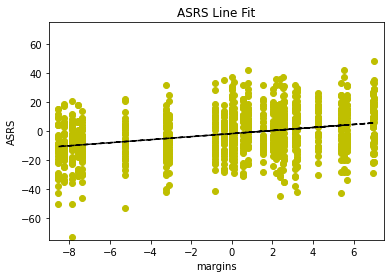

In [16]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]

coef = np.polyfit(x_var_asrs,y_var,1)
poly1d_fn = np.poly1d(coef) 

m1,b1 = np.polyfit(x_var_asrs, y_var, 1)
plt.plot(x_var_asrs,y_var, 'yo', x_var_asrs, poly1d_fn(x_var_asrs), '--k')
plt.title("ASRS Line Fit")
plt.xlabel('margins')
plt.ylabel('ASRS')

plt.xlim(-9, 7.5)
plt.ylim(-75, 75)
print(f"The slope is {m1} and the intercept is {b1}")     # Important Quantities are the y-intercept and the Slope!


The slope is -1.0279674769466098 and the intercept is -1.7175221127723985


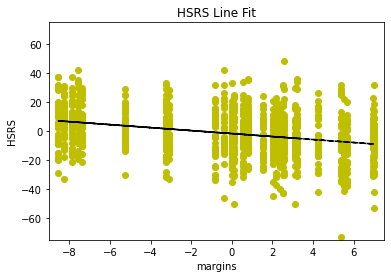

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]

coef = np.polyfit(x_var_hsrs,y_var,1)
poly1d_fn = np.poly1d(coef) 

m2,b2 = np.polyfit(x_var_hsrs, y_var, 1)
plt.plot(x_var_hsrs,y_var, 'yo', x_var_hsrs, poly1d_fn(x_var_hsrs), '--k')
plt.title("HSRS Line Fit")
plt.xlabel('margins')
plt.ylabel('HSRS')

plt.xlim(-9, 7.5)
plt.ylim(-75, 75)
print(f"The slope is {m2} and the intercept is {b2}")     # Important Quantity is the Slope!


The important values to consider are ASRS's y-intercept of around -1.7213788460253954 (indicating that away teams have 1 to 2 points of SRS less than the home teams), and the two slopes of ASRS and HSRS...

The slope of ASRS is around 1.0484077200960442 which highlights that the amount of change to the ASRS to change the margin is around 1.

The slope of HSRS is around -1.0279674769466098 which highlights that the amount of change to the HSRS to change the margin is around -1.

These values make sense because we are basing these values on SRS, the website's calculated values instead of actual team points.

We can now use these values to satisfy the following equation:

Predicted Margin of Matchup (aka Spread) = y-intercept + (ASRS Slope * ASRS) + (HSRS Slope * HSRS)

Predicted Margin of Matchup is illustrated for the Away Team
That means the Predicted Odds + Predicted Margin of Matchup shows which team is actually favored (Predicted Odds are given by the Betting Website at the time of the event)

Example: If Predicted Margin of Matchup = 1.9 for the Away Team, but the Betting Odds are showing that the odds for the away team is -3, then we do 1.9 - 3 to get 1.1. This means the HOME TEAM is favored by 1.1.

Used this resource for moneyline to spread converter: https://www.sportsbookreview.com/betting-calculators/spread-ml-converter/

In [18]:
# This is the calculation process...
# Let's use the Los Angeles Clippers vs Golden State Warriors as an example!
# Warriors at Clippers

pmm = 0         # Predicted Margin of Matchup
y_intercept = b1            # y-intercept
asrs_slope = m1             # asrs_slope
hsrs_slope = m2             # hsrs_slope
for i in range(len(df)):
    if df.loc[i][0] == "Golden State Warriors" and df.loc[i][2] == 'Los Angeles Clippers':
        asrs = df.loc[i][5]
        hsrs = df.loc[i][6]
pmm = y_intercept + (asrs*asrs_slope) + (hsrs*hsrs_slope)

# Note: These are made-up values... online websites only have betting odds for the championship, not individual games
# Using an online moneyline to spread converter: GSW = -350 odds, LAC = +270 odds
# Spread comes out to be 7.5 in favor of the warriors!

# Example 1
a_team = 'Golden State Warriors'
h_team = 'Los Angeles Clippers'
spread = 7.5        
outcome = pmm + spread

if pmm >= 0:
    print(f"The Predicted Margin of Matchup comes out to be {pmm} in favor of the {a_team}!")
else:
    print(f"The Predicted Margin of Matchup comes out to be {pmm} in favor of the {h_team}!")

if pmm > 0 and outcome > 0:
    print(f"Since the spread came out to be ({spread}), our model predicts a spread of {outcome} so you should bet on the {a_team}!")
elif pmm < 0 and outcome > 0:
    print(f"Since the spread came out to be ({spread}), our model predicts a spread of {outcome} so you should bet on the {a_team}!")
else:
    print(f"Since the spread came out to be ({spread}), our model predicts a spread of {outcome} so you should bet on the {h_team}!")
print()

# Example 2
# Heat have a -500 odds while Magic have +360 odds

pmm2 = 0         # Predicted Margin of Matchup
y_intercept2 = b1            # y-intercept
asrs_slope2 = m1             # asrs_slope
hsrs_slope2 = m2             # hsrs_slope
for i in range(len(df)):
    if df.loc[i][0] == "Orlando Magic" and df.loc[i][2] == 'Miami Heat':
        asrs = df.loc[i][5]
        hsrs = df.loc[i][6]
pmm2 = y_intercept2 + (asrs*asrs_slope2) + (hsrs*hsrs_slope2)

a_team2 = 'Orlando Magic'
h_team2 = 'Miami Heat'
spread2 = 8.5        
outcome2 = pmm2 + spread

if pmm2 >= 0:
    print(f"The Predicted Margin of Matchup comes out to be {pmm2} in favor of the {a_team2}!")
else:
    print(f"The Predicted Margin of Matchup comes out to be {pmm2} in favor of the {h_team2}!")

if pmm2 > 0 and outcome2 > 0:
    print(f"Since the spread came out to be ({spread2}), our model predicts a spread of {outcome2} so you should bet on the {a_team2}!")
elif pmm2 < 0 and outcome2 > 0:
    print(f"Since the spread came out to be ({spread2}), our model predicts a spread of {outcome2} so you should bet on the {a_team2}!")
else:
    print(f"Since the spread came out to be ({spread2}), our model predicts a spread of {outcome2} so you should bet on the {h_team2}!")


The Predicted Margin of Matchup comes out to be 3.9733146959795738 in favor of the Golden State Warriors!
Since the spread came out to be (7.5), our model predicts a spread of 11.473314695979575 so you should bet on the Golden State Warriors!

The Predicted Margin of Matchup comes out to be -14.037579946239491 in favor of the Miami Heat!
Since the spread came out to be (8.5), our model predicts a spread of -6.537579946239491 so you should bet on the Miami Heat!


In [20]:
filename = 'Simple_NBA_2021_Schedule_and_Model_-_SRS_-_Other_Stats.csv'  # this is a csv file with every home and away team's stats in each game of the 2021 season.
df_stats = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

Simple_NBA_2021_Schedule_and_Model_-_SRS_-_Other_Stats.csv : file read into a pandas dataframe.


In [22]:
df_stats

,Team,SRS,W/L%,PS/G,PA/G
0,Miami Heat,4.23,0.646,110.0,105.6
1,Boston Celtics,7.02,0.622,111.8,104.5
2,Milwaukee Bucks,3.22,0.622,115.5,112.1
3,Philadelphia 76ers,2.57,0.622,109.9,107.3
4,Toronto Raptors,2.38,0.585,109.4,107.1
5,Chicago Bulls,-0.38,0.561,111.6,112.0
6,Brooklyn Nets,0.82,0.537,112.9,112.1
7,Cleveland Cavaliers,2.04,0.537,107.8,105.7
8,Atlanta Hawks,1.55,0.524,113.9,112.4
9,Charlotte Hornets,0.53,0.524,115.3,114.9


In [23]:
# team_srs = df_srs.loc[0][0]       # Convenient to see what the specific 'loc' command does.
# team_srs_val = df_srs.loc[0][1]   # Convenient to see what the specific 'loc' command does.
# team_away = df.loc[0][0]          # Convenient to see what the specific 'loc' command does.
l = []
for i in range(len(df)):            
    for j in range(len(df_stats)):
        if df.loc[i][0] == df_stats.loc[j][0]:
            l += [df_stats.loc[j][2]]
print(l)                            # Grabs the W/L% (Away Team's STATS Scores) and puts them into a list...

[0.537, 0.646, 0.305, 0.561, 0.622, 0.427, 0.537, 0.244, 0.622, 0.268, 0.293, 0.366, 0.585, 0.634, 0.622, 0.512, 0.451, 0.305, 0.524, 0.585, 0.537, 0.293, 0.439, 0.415, 0.78, 0.598, 0.524, 0.646, 0.634, 0.28, 0.439, 0.622, 0.78, 0.683, 0.524, 0.622, 0.268, 0.622, 0.646, 0.683, 0.622, 0.622, 0.561, 0.268, 0.427, 0.28, 0.439, 0.537, 0.329, 0.622, 0.646, 0.402, 0.244, 0.585, 0.524, 0.427, 0.646, 0.305, 0.524, 0.561, 0.402, 0.366, 0.683, 0.537, 0.524, 0.28, 0.598, 0.451, 0.415, 0.683, 0.268, 0.524, 0.305, 0.366, 0.634, 0.512, 0.537, 0.622, 0.268, 0.451, 0.585, 0.524, 0.598, 0.646, 0.415, 0.293, 0.585, 0.537, 0.366, 0.329, 0.598, 0.28, 0.244, 0.537, 0.415, 0.329, 0.427, 0.561, 0.585, 0.585, 0.268, 0.293, 0.622, 0.646, 0.366, 0.439, 0.244, 0.329, 0.451, 0.622, 0.561, 0.585, 0.524, 0.585, 0.512, 0.634, 0.524, 0.439, 0.622, 0.598, 0.622, 0.244, 0.293, 0.537, 0.415, 0.683, 0.451, 0.537, 0.512, 0.439, 0.305, 0.524, 0.244, 0.598, 0.622, 0.622, 0.524, 0.402, 0.537, 0.537, 0.598, 0.305, 0.622, 0.41

In [24]:
# Using DataFrame.insert() to add a column
df.insert(7, "AW/L%", l, True)       # Inserts the Home Team's W/L% score into the current table (aka HSRS)
df


,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS,AW/L%
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22,0.537
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08,0.646
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53,0.305
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36,0.561
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01,0.622
...,...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16,0.402
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09,0.293
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84,0.646
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94,0.366


In [25]:
# team_srs = df_srs.loc[0][0]       # Convenient to see what the specific 'loc' command does.
# team_srs_val = df_srs.loc[0][1]   # Convenient to see what the specific 'loc' command does.
# team_away = df.loc[0][0]          # Convenient to see what the specific 'loc' command does.
l = []
for i in range(len(df)):            
    for j in range(len(df_stats)):
        if df.loc[i][0] == df_stats.loc[j][0]:
            l += [df_stats.loc[j][3]]
print(l)                            # Grabs the PS/G (points per game) (Away Team's STATS Scores) and puts them into a list...

[112.9, 111.0, 111.5, 111.6, 111.8, 108.6, 107.8, 109.7, 109.9, 104.2, 103.7, 110.3, 112.7, 108.0, 115.5, 108.4, 106.5, 111.5, 115.3, 109.4, 112.9, 103.7, 109.3, 113.2, 114.8, 113.6, 113.9, 110.0, 108.0, 104.8, 109.3, 115.5, 114.8, 115.6, 115.3, 111.8, 104.2, 109.9, 111.0, 115.6, 111.8, 115.5, 111.6, 104.2, 108.6, 104.8, 109.3, 107.8, 106.2, 109.9, 111.0, 112.1, 109.7, 112.7, 115.3, 108.6, 110.0, 111.5, 113.9, 115.9, 112.1, 110.3, 115.6, 107.8, 113.9, 104.8, 113.6, 106.5, 113.2, 115.6, 104.2, 115.3, 111.5, 110.3, 108.0, 108.4, 107.8, 111.8, 104.2, 106.5, 109.4, 113.9, 113.6, 110.0, 113.2, 103.7, 112.7, 107.8, 110.3, 106.2, 113.6, 104.8, 109.7, 107.8, 113.2, 106.2, 108.6, 111.6, 109.4, 112.7, 104.2, 103.7, 115.5, 110.0, 110.3, 109.3, 109.7, 106.2, 106.5, 111.8, 111.6, 109.4, 113.9, 112.7, 108.4, 108.0, 115.3, 109.3, 109.9, 113.6, 111.8, 109.7, 103.7, 112.9, 113.2, 115.6, 106.5, 107.8, 108.4, 109.3, 111.5, 115.3, 109.7, 113.6, 109.9, 111.8, 113.9, 112.1, 112.9, 107.8, 113.6, 111.5, 115.5

In [26]:
# Using DataFrame.insert() to add a column
df.insert(7, "APS/G", l, True)       # Inserts the Home Team's W/L% score into the current table (aka HSRS)
df

,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS,APS/G,AW/L%
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22,112.9,0.537
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08,111.0,0.646
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53,111.5,0.305
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36,111.6,0.561
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01,111.8,0.622
...,...,...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16,112.1,0.402
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09,103.7,0.293
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84,111.0,0.646
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94,110.3,0.366


In [27]:
# team_srs = df_srs.loc[0][0]       # Convenient to see what the specific 'loc' command does.
# team_srs_val = df_srs.loc[0][1]   # Convenient to see what the specific 'loc' command does.
# team_away = df.loc[0][0]          # Convenient to see what the specific 'loc' command does.
l = []
for i in range(len(df)):            
    for j in range(len(df_stats)):
        if df.loc[i][0] == df_stats.loc[j][0]:
            l += [df_stats.loc[j][4]]
print(l)                            # Grabs the PA/G (points per game) (Away Team's STATS Scores) and puts them into a list...

[112.1, 105.5, 114.9, 112.0, 104.5, 112.0, 105.7, 118.2, 107.3, 112.2, 111.8, 115.8, 110.4, 104.7, 112.1, 108.4, 106.6, 114.9, 114.9, 107.1, 112.1, 111.8, 110.3, 113.0, 107.3, 107.6, 112.4, 105.6, 104.7, 112.5, 110.3, 112.1, 107.3, 109.9, 114.9, 104.5, 112.2, 107.3, 105.5, 109.9, 104.5, 112.1, 112.0, 112.2, 112.0, 112.5, 110.3, 105.7, 115.1, 107.3, 105.5, 115.1, 118.2, 110.4, 114.9, 112.0, 105.6, 114.9, 112.4, 113.3, 115.1, 115.8, 109.9, 105.7, 112.4, 112.5, 107.6, 106.6, 113.0, 109.9, 112.2, 114.9, 114.9, 115.8, 104.7, 108.4, 105.7, 104.5, 112.2, 106.6, 107.1, 112.4, 107.6, 105.6, 113.0, 111.8, 110.4, 105.7, 115.8, 115.1, 107.6, 112.5, 118.2, 105.7, 113.0, 115.1, 112.0, 112.0, 107.1, 110.4, 112.2, 111.8, 112.1, 105.6, 115.8, 110.3, 118.2, 115.1, 106.6, 104.5, 112.0, 107.1, 112.4, 110.4, 108.4, 104.7, 114.9, 110.3, 107.3, 107.6, 104.5, 118.2, 111.8, 112.1, 113.0, 109.9, 106.6, 105.7, 108.4, 110.3, 114.9, 114.9, 118.2, 107.6, 107.3, 104.5, 112.4, 115.1, 112.1, 105.7, 107.6, 114.9, 112.1

In [28]:
# Using DataFrame.insert() to add a column
df.insert(7, "APA/G", l, True)       # Inserts the Home Team's W/L% score into the current table (aka HSRS)
df

,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS,APA/G,APS/G,AW/L%
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22,112.1,112.9,0.537
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08,105.5,111.0,0.646
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53,114.9,111.5,0.305
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36,112.0,111.6,0.561
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01,104.5,111.8,0.622
...,...,...,...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16,115.1,112.1,0.402
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09,111.8,103.7,0.293
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84,105.5,111.0,0.646
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94,115.8,110.3,0.366


In [29]:
# team_srs = df_srs.loc[0][0]       # Convenient to see what the specific 'loc' command does.
# team_srs_val = df_srs.loc[0][1]   # Convenient to see what the specific 'loc' command does.
# team_away = df.loc[0][0]          # Convenient to see what the specific 'loc' command does.
l = []
for i in range(len(df)):            
    for j in range(len(df_stats)):
        if df.loc[i][2] == df_stats.loc[j][0]:
            l += [df_stats.loc[j][2]]
print(l)                            # Grabs the W/L% (Away Team's STATS Scores) and puts them into a list...

[0.622, 0.402, 0.524, 0.28, 0.451, 0.585, 0.683, 0.561, 0.439, 0.415, 0.598, 0.329, 0.78, 0.524, 0.646, 0.646, 0.268, 0.427, 0.537, 0.622, 0.622, 0.244, 0.561, 0.585, 0.402, 0.366, 0.537, 0.305, 0.585, 0.561, 0.561, 0.415, 0.329, 0.512, 0.537, 0.244, 0.451, 0.293, 0.366, 0.402, 0.524, 0.305, 0.585, 0.646, 0.537, 0.524, 0.561, 0.585, 0.512, 0.451, 0.293, 0.415, 0.634, 0.598, 0.268, 0.622, 0.537, 0.585, 0.439, 0.622, 0.293, 0.78, 0.329, 0.512, 0.427, 0.622, 0.244, 0.561, 0.634, 0.646, 0.585, 0.646, 0.537, 0.439, 0.585, 0.329, 0.402, 0.427, 0.28, 0.439, 0.305, 0.622, 0.561, 0.683, 0.622, 0.646, 0.561, 0.78, 0.634, 0.524, 0.622, 0.537, 0.402, 0.524, 0.305, 0.622, 0.524, 0.622, 0.451, 0.683, 0.561, 0.512, 0.28, 0.634, 0.598, 0.78, 0.402, 0.537, 0.305, 0.268, 0.622, 0.427, 0.537, 0.683, 0.561, 0.415, 0.646, 0.366, 0.28, 0.524, 0.646, 0.78, 0.402, 0.28, 0.268, 0.427, 0.622, 0.585, 0.561, 0.646, 0.329, 0.366, 0.585, 0.646, 0.561, 0.634, 0.78, 0.329, 0.585, 0.451, 0.268, 0.366, 0.427, 0.293, 0.

In [30]:
# Using DataFrame.insert() to add a column
df.insert(10, "HW/L%", l, True)       # Inserts the Home Team's W/L% score into the current table (aka HSRS)
df

,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS,APA/G,APS/G,AW/L%,HW/L%
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22,112.1,112.9,0.537,0.622
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08,105.5,111.0,0.646,0.402
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53,114.9,111.5,0.305,0.524
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36,112.0,111.6,0.561,0.280
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01,104.5,111.8,0.622,0.451
...,...,...,...,...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16,115.1,112.1,0.402,0.585
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09,111.8,103.7,0.293,0.512
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84,105.5,111.0,0.646,0.439
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94,115.8,110.3,0.366,0.780


In [31]:
# team_srs = df_srs.loc[0][0]       # Convenient to see what the specific 'loc' command does.
# team_srs_val = df_srs.loc[0][1]   # Convenient to see what the specific 'loc' command does.
# team_away = df.loc[0][0]          # Convenient to see what the specific 'loc' command does.
l = []
for i in range(len(df)):            
    for j in range(len(df_stats)):
        if df.loc[i][2] == df_stats.loc[j][0]:
            l += [df_stats.loc[j][3]]
print(l)                            # Grabs the PS/G (points per game) (Away Team's STATS Scores) and puts them into a list...

[115.5, 112.1, 115.3, 104.8, 106.5, 109.4, 115.6, 115.9, 109.3, 113.2, 113.6, 106.2, 114.8, 113.9, 110.0, 111.0, 104.2, 108.6, 107.8, 111.8, 109.9, 109.7, 111.6, 112.7, 112.1, 110.3, 107.8, 111.5, 109.4, 111.6, 115.9, 113.2, 106.2, 108.4, 112.9, 109.7, 106.5, 103.7, 110.3, 112.1, 115.3, 111.5, 109.4, 110.0, 112.9, 113.9, 115.9, 112.7, 108.4, 106.5, 103.7, 113.2, 108.0, 113.6, 104.2, 111.8, 112.9, 109.4, 109.3, 115.5, 103.7, 114.8, 106.2, 108.4, 108.6, 109.9, 109.7, 111.6, 108.0, 111.0, 109.4, 110.0, 112.9, 109.3, 112.7, 106.2, 112.1, 108.6, 104.8, 109.3, 111.5, 109.9, 111.6, 115.6, 115.5, 111.0, 115.9, 114.8, 108.0, 115.3, 115.5, 112.9, 112.1, 115.3, 111.5, 109.9, 113.9, 111.8, 106.5, 115.6, 115.9, 108.4, 104.8, 108.0, 113.6, 114.8, 112.1, 107.8, 111.5, 104.2, 109.9, 108.6, 112.9, 115.6, 115.9, 113.2, 111.0, 110.3, 104.8, 113.9, 110.0, 114.8, 112.1, 104.8, 104.2, 108.6, 115.5, 109.4, 115.9, 111.0, 106.2, 110.3, 112.7, 110.0, 111.6, 108.0, 114.8, 106.2, 109.4, 106.5, 104.2, 110.3, 108.6

In [32]:
# Using DataFrame.insert() to add a column
df.insert(10, "HPS/G", l, True)       # Inserts the Home Team's W/L% score into the current table (aka HSRS)
df

,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS,APA/G,APS/G,AW/L%,HPS/G,HW/L%
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22,112.1,112.9,0.537,115.5,0.622
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08,105.5,111.0,0.646,112.1,0.402
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53,114.9,111.5,0.305,115.3,0.524
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36,112.0,111.6,0.561,104.8,0.280
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01,104.5,111.8,0.622,106.5,0.451
...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16,115.1,112.1,0.402,112.7,0.585
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09,111.8,103.7,0.293,108.4,0.512
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84,105.5,111.0,0.646,109.3,0.439
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94,115.8,110.3,0.366,114.8,0.780


In [33]:
# team_srs = df_srs.loc[0][0]       # Convenient to see what the specific 'loc' command does.
# team_srs_val = df_srs.loc[0][1]   # Convenient to see what the specific 'loc' command does.
# team_away = df.loc[0][0]          # Convenient to see what the specific 'loc' command does.
l = []
for i in range(len(df)):            
    for j in range(len(df_stats)):
        if df.loc[i][2] == df_stats.loc[j][0]:
            l += [df_stats.loc[j][4]]
print(l)                            # Grabs the PA/G (points per game) (Away Team's STATS Scores) and puts them into a list...

[112.1, 115.1, 114.9, 112.5, 106.6, 107.1, 109.9, 113.3, 110.3, 113.0, 107.6, 115.1, 107.3, 112.4, 105.6, 105.5, 112.2, 112.0, 105.7, 104.5, 107.3, 118.2, 112.0, 110.4, 115.1, 115.8, 105.7, 114.9, 107.1, 112.0, 113.3, 113.0, 115.1, 108.4, 112.1, 118.2, 106.6, 111.8, 115.8, 115.1, 114.9, 114.9, 107.1, 105.6, 112.1, 112.4, 113.3, 110.4, 108.4, 106.6, 111.8, 113.0, 104.7, 107.6, 112.2, 104.5, 112.1, 107.1, 110.3, 112.1, 111.8, 107.3, 115.1, 108.4, 112.0, 107.3, 118.2, 112.0, 104.7, 105.5, 107.1, 105.6, 112.1, 110.3, 110.4, 115.1, 115.1, 112.0, 112.5, 110.3, 114.9, 107.3, 112.0, 109.9, 112.1, 105.5, 113.3, 107.3, 104.7, 114.9, 112.1, 112.1, 115.1, 114.9, 114.9, 107.3, 112.4, 104.5, 106.6, 109.9, 113.3, 108.4, 112.5, 104.7, 107.6, 107.3, 115.1, 105.7, 114.9, 112.2, 107.3, 112.0, 112.1, 109.9, 113.3, 113.0, 105.5, 115.8, 112.5, 112.4, 105.6, 107.3, 115.1, 112.5, 112.2, 112.0, 112.1, 107.1, 113.3, 105.5, 115.1, 115.8, 110.4, 105.6, 112.0, 104.7, 107.3, 115.1, 107.1, 106.6, 112.2, 115.8, 112.0

In [35]:
# Using DataFrame.insert() to add a column
df.insert(10, "HPA/G", l, True)       # Inserts the Home Team's W/L% score into the current table (aka HSRS)
df

,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS,APA/G,APS/G,AW/L%,HPA/G,HPA/G,HPS/G,HW/L%
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22,112.1,112.9,0.537,112.1,112.1,115.5,0.622
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08,105.5,111.0,0.646,115.1,115.1,112.1,0.402
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53,114.9,111.5,0.305,114.9,114.9,115.3,0.524
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36,112.0,111.6,0.561,112.5,112.5,104.8,0.280
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01,104.5,111.8,0.622,106.6,106.6,106.5,0.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16,115.1,112.1,0.402,110.4,110.4,112.7,0.585
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09,111.8,103.7,0.293,108.4,108.4,108.4,0.512
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84,105.5,111.0,0.646,110.3,110.3,109.3,0.439
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94,115.8,110.3,0.366,107.3,107.3,114.8,0.780


The slope is -0.9322671183431339 and the intercept is 101.3980252049399


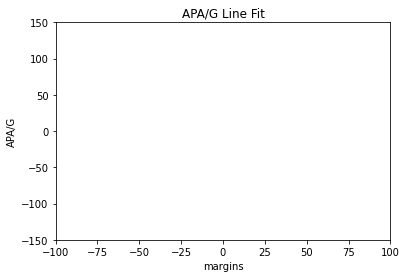

In [37]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
x_var_apa = []
x_var_aps = []
x_var_aw = []
x_var_hpa = []
x_var_hps = []
x_var_hw = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]
    x_var_apa += [df.loc[i][7]]
    x_var_aps += [df.loc[i][8]]
    x_var_aw += [df.loc[i][9]]
    x_var_hpa += [df.loc[i][10]]
    x_var_hps += [df.loc[i][11]]
    x_var_hw += [df.loc[i][12]]
coef = np.polyfit(x_var_apa,y_var,1)
poly1d_fn = np.poly1d(coef) 

m3,b3 = np.polyfit(x_var_apa, y_var, 1)
plt.plot(x_var_apa, y_var, 'yo', x_var_apa, poly1d_fn(x_var_apa), '--k')
plt.title("APA/G Line Fit")
plt.xlabel('margins')
plt.ylabel('APA/G')

plt.xlim(-100, 100)
plt.ylim(-150, 150)
print(f"The slope is {m3} and the intercept is {b3}")     # Important Quantities are the y-intercept and the Slope!

# For some reason, the line and data points don't show up...


The slope is 0.9036257257259585 and the intercept is -101.66831686401515


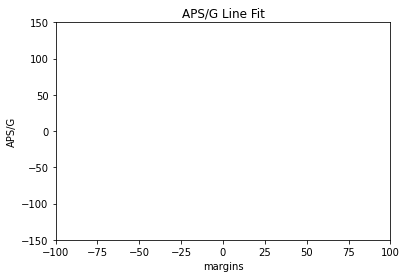

In [40]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
x_var_apa = []
x_var_aps = []
x_var_aw = []
x_var_hpa = []
x_var_hps = []
x_var_hw = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]
    x_var_apa += [df.loc[i][7]]
    x_var_aps += [df.loc[i][8]]
    x_var_aw += [df.loc[i][9]]
    x_var_hpa += [df.loc[i][10]]
    x_var_hps += [df.loc[i][11]]
    x_var_hw += [df.loc[i][12]]
coef = np.polyfit(x_var_aps,y_var,1)
poly1d_fn = np.poly1d(coef) 

m4,b4 = np.polyfit(x_var_aps, y_var, 1)
plt.plot(x_var_aps, y_var, 'yo', x_var_aps, poly1d_fn(x_var_aps), '--k')
plt.title("APS/G Line Fit")
plt.xlabel('margins')
plt.ylabel('APS/G')

plt.xlim(-100, 100)
plt.ylim(-150, 150)
print(f"The slope is {m4} and the intercept is {b4}")     # Important Quantities are the y-intercept and the Slope!

# For some reason, the line don't show up...


The slope is 32.329162607108586 and the intercept is -17.879103104783194


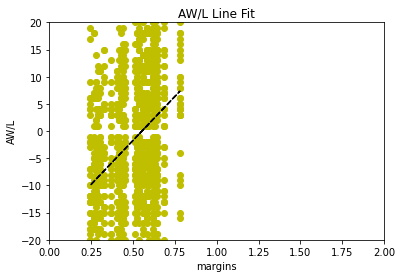

In [39]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
x_var_apa = []
x_var_aps = []
x_var_aw = []
x_var_hpa = []
x_var_hps = []
x_var_hw = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]
    x_var_apa += [df.loc[i][7]]
    x_var_aps += [df.loc[i][8]]
    x_var_aw += [df.loc[i][9]]
    x_var_hpa += [df.loc[i][10]]
    x_var_hps += [df.loc[i][11]]
    x_var_hw += [df.loc[i][12]]
coef = np.polyfit(x_var_aw,y_var,1)
poly1d_fn = np.poly1d(coef) 

m5,b5 = np.polyfit(x_var_aw, y_var, 1)
plt.plot(x_var_aw, y_var, 'yo', x_var_aw, poly1d_fn(x_var_aw), '--k')
plt.title("AW/L Line Fit")
plt.xlabel('margins')
plt.ylabel('AW/L')

plt.xlim(0, 2)
plt.ylim(-20, 20)
print(f"The slope is {m5} and the intercept is {b5}")     # Important Quantities are the y-intercept and the Slope!



The slope is 0.8943539736955924 and the intercept is -100.64185465052607


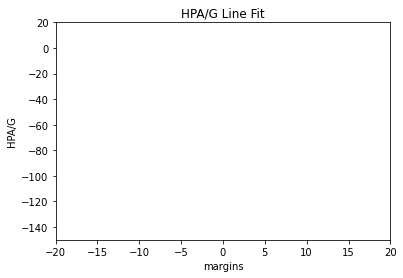

In [41]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
x_var_apa = []
x_var_aps = []
x_var_aw = []
x_var_hpa = []
x_var_hps = []
x_var_hw = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]
    x_var_apa += [df.loc[i][7]]
    x_var_aps += [df.loc[i][8]]
    x_var_aw += [df.loc[i][9]]
    x_var_hpa += [df.loc[i][10]]
    x_var_hps += [df.loc[i][11]]
    x_var_hw += [df.loc[i][12]]
coef = np.polyfit(x_var_hpa,y_var,1)
poly1d_fn = np.poly1d(coef) 

m6,b6 = np.polyfit(x_var_hpa, y_var, 1)
plt.plot(x_var_hpa, y_var, 'yo', x_var_hpa, poly1d_fn(x_var_hpa), '--k')
plt.title("HPA/G Line Fit")
plt.xlabel('margins')
plt.ylabel('HPA/G')

plt.xlim(-20, 20)
plt.ylim(-150, 20)
print(f"The slope is {m6} and the intercept is {b6}")     # Important Quantities are the y-intercept and the Slope!

# For some reason, the line don't show up...


The slope is 0.8943539736955924 and the intercept is -100.64185465052607


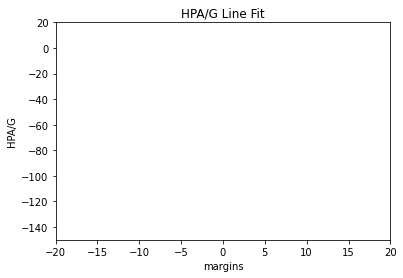

In [42]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
x_var_apa = []
x_var_aps = []
x_var_aw = []
x_var_hpa = []
x_var_hps = []
x_var_hw = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]
    x_var_apa += [df.loc[i][7]]
    x_var_aps += [df.loc[i][8]]
    x_var_aw += [df.loc[i][9]]
    x_var_hpa += [df.loc[i][10]]
    x_var_hps += [df.loc[i][11]]
    x_var_hw += [df.loc[i][12]]
coef = np.polyfit(x_var_hpa,y_var,1)
poly1d_fn = np.poly1d(coef) 

m6,b6 = np.polyfit(x_var_hpa, y_var, 1)
plt.plot(x_var_hpa, y_var, 'yo', x_var_hpa, poly1d_fn(x_var_hpa), '--k')
plt.title("HPA/G Line Fit")
plt.xlabel('margins')
plt.ylabel('HPA/G')

plt.xlim(-20, 20)
plt.ylim(-150, 20)
print(f"The slope is {m6} and the intercept is {b6}")     # Important Quantities are the y-intercept and the Slope!

# For some reason, the line don't show up...


The slope is 0.8943539736955924 and the intercept is -100.64185465052607


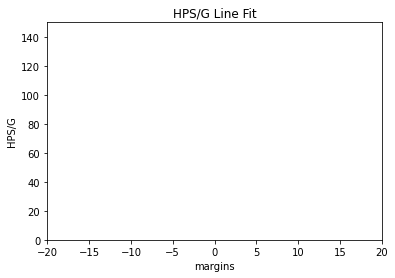

In [43]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
x_var_apa = []
x_var_aps = []
x_var_aw = []
x_var_hpa = []
x_var_hps = []
x_var_hw = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]
    x_var_apa += [df.loc[i][7]]
    x_var_aps += [df.loc[i][8]]
    x_var_aw += [df.loc[i][9]]
    x_var_hpa += [df.loc[i][10]]
    x_var_hps += [df.loc[i][11]]
    x_var_hw += [df.loc[i][12]]
coef = np.polyfit(x_var_hps,y_var,1)
poly1d_fn = np.poly1d(coef) 

m7,b7 = np.polyfit(x_var_hps, y_var, 1)
plt.plot(x_var_hps, y_var, 'yo', x_var_hps, poly1d_fn(x_var_hps), '--k')
plt.title("HPS/G Line Fit")
plt.xlabel('margins')
plt.ylabel('HPS/G')

plt.xlim(-20, 20)
plt.ylim(0, 150)
print(f"The slope is {m7} and the intercept is {b7}")     # Important Quantities are the y-intercept and the Slope!

# For some reason, the line don't show up...


The slope is -0.9097736144000559 and the intercept is 98.90353810026768


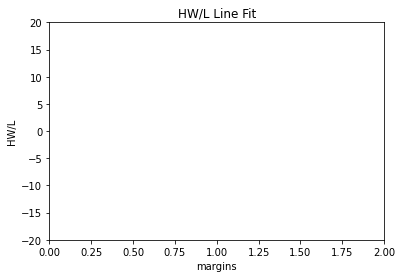

In [44]:
import numpy as np
import matplotlib.pyplot as plt
x_var_hsrs = []
x_var_asrs = []
x_var_apa = []
x_var_aps = []
x_var_aw = []
x_var_hpa = []
x_var_hps = []
x_var_hw = []
y_var = []
for i in range(len(df)):
    y_var += [df.loc[i][4]]
    x_var_hsrs += [df.loc[i][6]]
    x_var_asrs += [df.loc[i][5]]
    x_var_apa += [df.loc[i][7]]
    x_var_aps += [df.loc[i][8]]
    x_var_aw += [df.loc[i][9]]
    x_var_hpa += [df.loc[i][10]]
    x_var_hps += [df.loc[i][11]]
    x_var_hw += [df.loc[i][12]]
coef = np.polyfit(x_var_hw,y_var,1)
poly1d_fn = np.poly1d(coef) 

m8,b8 = np.polyfit(x_var_hw, y_var, 1)
plt.plot(x_var_hw, y_var, 'yo', x_var_hw, poly1d_fn(x_var_hw), '--k')
plt.title("HW/L Line Fit")
plt.xlabel('margins')
plt.ylabel('HW/L')

plt.xlim(0, 2)
plt.ylim(-20, 20)
print(f"The slope is {m8} and the intercept is {b8}")     # Important Quantities are the y-intercept and the Slope!




In [45]:
# This is the calculation process...
# Let's use the Los Angeles Clippers vs Golden State Warriors as an example!
# Warriors at Clippers

from tkinter import Y


pmm = 0         # Predicted Margin of Matchup
y_intercept = b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8            # y-intercept
asrs_slope = m1             # asrs_slope
hsrs_slope = m2             # hsrs_slope
apa_slope = m3
aps_slope = m4
aw_slope = m5
hpa_slope = m6
hps_slope = m7
hw_slope = m8
for i in range(len(df)):
    if df.loc[i][0] == "Golden State Warriors" and df.loc[i][2] == 'Los Angeles Clippers':
        asrs = df.loc[i][5]
        hsrs = df.loc[i][6]
        apa = df.loc[i][7]
        aps = df.loc[i][8]
        aw = df.loc[i][8]
        hpa = df.loc[i][9]
        hps = df.loc[i][10]
        hw = df.loc[i][11]
pmm = y_intercept + (asrs*asrs_slope) + (hsrs*hsrs_slope) + (apa*apa_slope) + (aps*aps_slope) + (aw*aw_slope) + (hpa*hpa_slope) + (hps*hps_slope) + (hw*hw_slope)

# Note: These are made-up values... online websites only have betting odds for the championship, not individual games
# Using an online moneyline to spread converter: GSW = -350 odds, LAC = +270 odds
# Spread comes out to be 7.5 in favor of the warriors!
# This is the calculation process...
# Let's use the Los Angeles Clippers vs Golden State Warriors as an example!
# Warriors at Clippers

# Note: These are made-up values... online websites only have betting odds for the championship, not individual games
# Using an online moneyline to spread converter: GSW = -350 odds, LAC = +270 odds
# Spread comes out to be 7.5 in favor of the warriors!

# Example 1
a_team = 'Golden State Warriors'
h_team = 'Los Angeles Clippers'
spread = 7.5        
outcome = pmm + spread

if pmm >= 0:
    print(f"The Predicted Margin of Matchup comes out to be {pmm} in favor of the {a_team}!")
else:
    print(f"The Predicted Margin of Matchup comes out to be {pmm} in favor of the {h_team}!")

if pmm > 0 and outcome > 0:
    print(f"Since the spread came out to be ({spread}), our model predicts a spread of {outcome} so you should bet on the {a_team}!")
elif pmm < 0 and outcome > 0:
    print(f"Since the spread came out to be ({spread}), our model predicts a spread of {outcome} so you should bet on the {a_team}!")
else:
    print(f"Since the spread came out to be ({spread}), our model predicts a spread of {outcome} so you should bet on the {h_team}!")
print()

# Example 2
# Heat have a -500 odds while Magic have +360 odds

pmm2 = 0         # Predicted Margin of Matchup
y_intercept2 = b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8            # y-intercept
asrs_slope2 = m1             # asrs_slope
hsrs_slope2 = m2             # hsrs_slope
apa_slope2 = m3
aps_slope2 = m4
aw_slope2 = m5
hpa_slope2 = m6
hps_slope2 = m7
hw_slope2 = m8
for i in range(len(df)):
    if df.loc[i][0] == "Orlando Magic" and df.loc[i][2] == 'Miami Heat':
        asrs = df.loc[i][5]
        hsrs = df.loc[i][6]
        apa = df.loc[i][7]
        aps = df.loc[i][8]
        aw = df.loc[i][8]
        hpa = df.loc[i][9]
        hps = df.loc[i][10]
        hw = df.loc[i][11]
pmm2 = y_intercept2 + (asrs*asrs_slope2) + (hsrs*hsrs_slope2) + (apa*apa_slope2) + (aps*aps_slope2) + (aw*aw_slope2) + (hpa*hpa_slope2) + (hps*hps_slope2) + (hw*hw_slope2)
h_team2 = 'Miami Heat'
spread2 = 8.5        
outcome2 = pmm2 + spread

if pmm2 >= 0:
    print(f"The Predicted Margin of Matchup comes out to be {pmm2} in favor of the {a_team2}!")
else:
    print(f"The Predicted Margin of Matchup comes out to be {pmm2} in favor of the {h_team2}!")

if pmm2 > 0 and outcome2 > 0:
    print(f"Since the spread came out to be ({spread2}), our model predicts a spread of {outcome2} so you should bet on the {a_team2}!")
elif pmm2 < 0 and outcome2 > 0:
    print(f"Since the spread came out to be ({spread2}), our model predicts a spread of {outcome2} so you should bet on the {a_team2}!")
else:
    print(f"Since the spread came out to be ({spread2}), our model predicts a spread of {outcome2} so you should bet on the {h_team2}!")


The Predicted Margin of Matchup comes out to be 3471.1178141926416 in favor of the Golden State Warriors!
Since the spread came out to be (7.5), our model predicts a spread of 3478.6178141926416 so you should bet on the Golden State Warriors!

The Predicted Margin of Matchup comes out to be 3220.582878386164 in favor of the Orlando Magic!
Since the spread came out to be (8.5), our model predicts a spread of 3228.082878386164 so you should bet on the Orlando Magic!


In [46]:
df

,Visitor/Neutral,PTS,Home/Neutral,PTS,Margin,ASRS,HSRS,APA/G,APS/G,AW/L%,HPA/G,HPA/G,HPS/G,HW/L%
0,Brooklyn Nets,104,Milwaukee Bucks,127,-23,0.82,3.22,112.1,112.9,0.537,112.1,112.1,115.5,0.622
1,Golden State Warriors,121,Los Angeles Lakers,114,7,5.52,-3.08,105.5,111.0,0.646,115.1,115.1,112.1,0.402
2,Indiana Pacers,122,Charlotte Hornets,123,-1,-3.26,0.53,114.9,111.5,0.305,114.9,114.9,115.3,0.524
3,Chicago Bulls,94,Detroit Pistons,88,6,-0.38,-7.36,112.0,111.6,0.561,112.5,112.5,104.8,0.280
4,Boston Celtics,134,New York Knicks,138,-4,7.02,-0.01,104.5,111.8,0.622,106.6,106.6,106.5,0.451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Los Angeles Lakers,146,Denver Nuggets,141,5,-3.08,2.16,115.1,112.1,0.402,110.4,110.4,112.7,0.585
1224,Oklahoma City Thunder,88,Los Angeles Clippers,138,-50,-7.90,0.09,111.8,103.7,0.293,108.4,108.4,108.4,0.512
1225,Golden State Warriors,128,New Orleans Pelicans,107,21,5.52,-0.84,105.5,111.0,0.646,110.3,110.3,109.3,0.439
1226,Sacramento Kings,116,Phoenix Suns,109,7,-5.26,6.94,115.8,110.3,0.366,107.3,107.3,114.8,0.780
